In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Load the data

In [2]:
# Abalone dataset https://archive.ics.uci.edu/ml/datasets/abalone
df_abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

df_abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
df_abalone_train.shape

(3320, 8)

The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:

In [4]:
abalone_features = df_abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [5]:
# Pack the features into a single NumPy array
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [6]:
abalone_features.shape

(3320, 7)

## Modeling

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [7]:
# Basic with no preprocessing
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

2021-10-26 16:22:58.543400: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps.

In [8]:
abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                      optimizer=tf.optimizers.Adam())

In [9]:
abalone_model.build(input_shape=abalone_features.shape)

In [10]:
abalone_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (3320, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (3320, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [11]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

2021-10-26 16:23:09.417561: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 57.4427
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 11.3035
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 8.6710
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 8.1322
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.6639
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.2783
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 6.9898
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7745
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6269
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 6.5154


## Preprocessing

It's good practice to normalize the inputs to your model. The `experimental.preprocessing` layers provide a convenient way to build this normalization into your model.

In [12]:
normalize = preprocessing.Normalization()

**Note: Only use your training data to .adapt() preprocessing layers. Do not use your validation or test data.**

In [13]:
normalize.adapt(abalone_features)

In [14]:
# use the normalization layer in the model
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 93.4579
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 55.4947
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 17.6425
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 6.0172
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.1197
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0311
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0308
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 5.0192
Epoch 9/10
104/104 [==============================] - 0s 5ms/step - loss: 4.9748
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9575


We use a loss function to determine how far the predicted values deviate from the actual values in the training data. ... We change the model weights to make the loss minimum, and that is what training is all about

## Classification Example

In [15]:
mnist = tf.keras.datasets.mnist

In [16]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=5,
                            validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3254 - accuracy: 0.9062 - val_loss: 0.1617 - val_accuracy: 0.9542
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1587 - accuracy: 0.9536 - val_loss: 0.1223 - val_accuracy: 0.9620
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1190 - accuracy: 0.9632 - val_loss: 0.1026 - val_accuracy: 0.9705
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0955 - accuracy: 0.9699 - val_loss: 0.0963 - val_accuracy: 0.9713
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.0843 - val_accuracy: 0.9736


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9770


[0.07651218771934509, 0.9769999980926514]

You can learn a lot about neural networks and deep learning models by observing their performance over time during training.

In [20]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

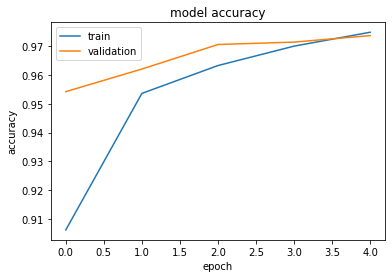

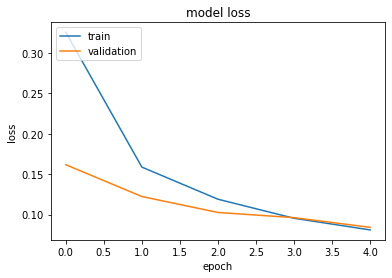

In [21]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()